In [209]:
import pandas as pd
from IPython.display import display
# pd.options.display.float_format = '{:,.2%}'.format
import numpy as np
from matplotlib.ticker import ScalarFormatter

from matplotlib import pyplot as plt
import seaborn as sns

# df = pd.read_csv('summary.csv', names=['ga', 'problem', 'ell', 'nfe_mean', 'nfe_std'], skiprows=1)
df = pd.read_csv('summary.csv', names=['ga', 'problem', 'ell', 'gen_mean', 'gen_std', 'nfe_mean', 'nfe_std', 'rm_mean', 'rm_std', 'bm_mean', 'bm_std'], skiprows=1)
df = df[df['ga'] != 'dsmga2-tos-ftf_mfN']
df = df[df['ga'] != 'dsmga2-tos-ftf_cntN']
df['rm_ratio'] = df['rm_mean'] / df['nfe_mean']
df['bm_ratio'] = df['bm_mean'] / df['nfe_mean']
df['rm_to_bm'] = df['rm_mean'] / df['bm_mean']

In [210]:
# P_list = ['four_five_six', 'three_four_five_six_seven']
# P_list = ['ftrap', 'ftrap4', 'ftrap6']
# P_list = ['linear_mktrap', 'exponential_mktrap']
P_list = ['mktrap']
# df[(df['problem'].isin(P_list)) & (df['ga'].isin(['FFF', 'FTF_CG'])) & (df['ell']==100)].sort_values('nfe_mean')
df[(df['ga'].isin(['FFF', 'FTF_CE', 'FTF_CG'])) & (df['ell']==480) & (df['problem']=='ftrap')].sort_values('problem')

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
103,FTF_CG,ftrap,480,46.850,7.563683,226599.206,3543.547322,81615.462,9093.939079,82472.984,6672.677245,0.360175,0.363960,0.989602
132,FTF_CE,ftrap,480,42.356,6.458116,235573.348,3360.785984,87186.428,9132.886700,84625.560,6439.146542,0.370103,0.359232,1.030261
260,FFF,ftrap,480,47.800,9.046215,238321.640,2063.747686,98848.700,11130.132432,79347.940,7224.403491,0.414770,0.332945,1.245763


In [211]:
df[(df['ga'].isin(['FFF', 'FTF_CG'])) & (df['ell']==400) & (df['problem']=='nk')].sort_values('problem')

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
120,FTF_CG,nk,400,16.629,6.275640,743466.263,392188.642772,296130.643,172234.933948,306223.720,177055.009376,0.398311,0.411887,0.967040
293,FFF,nk,400,14.134,5.564786,678819.897,325380.772927,268708.402,151231.101140,279369.455,146478.429931,0.395846,0.411552,0.961839


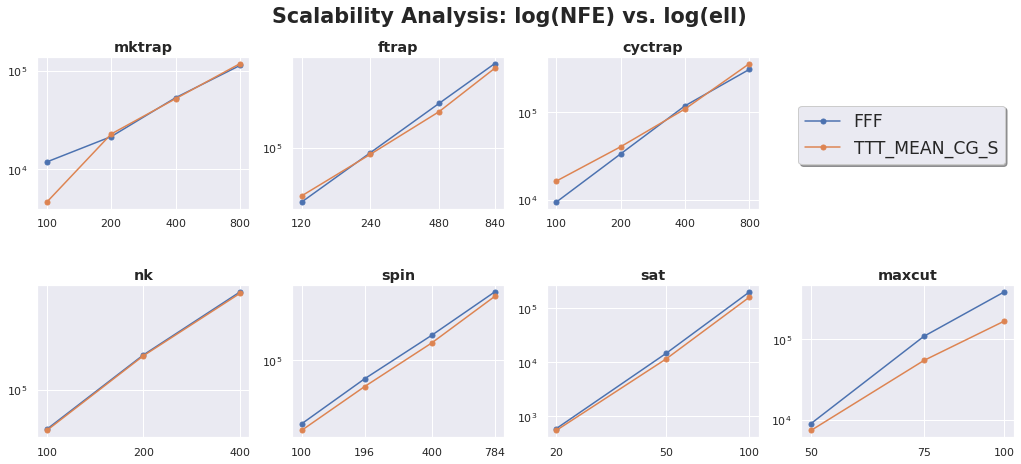

In [212]:
sns.set()
# print(plt.style.available)
# plt.style.use('seaborn-ticks')

def plot_scalability(problem, ga_list):
    global df

    problem_to_ells = {
        'mktrap': [100, 200, 400, 800],
        'ftrap': [120, 240, 480, 840],
        'cyctrap': [100, 200, 400, 800],
        'nk': [100, 200, 400], # 800
        'spin': [100, 196, 400, 784],
        'sat': [20, 50, 100], # 200
        'maxcut': [50, 75, 100]
    }
    
    plt.figure(figsize=(8, 6))
    for ga in ga_list:
        df_tmp = df[(df['ga']==ga) & (df['problem'] == problem) & (df['ell'].isin(problem_to_ells[problem]))]
        df_tmp = df_tmp.sort_values(by='ell', ascending=True)
        x = df_tmp['ell'].values
        y = df_tmp['nfe_mean'].values
        plt.plot(x, y, marker='.', markersize=10, label=ga)
        plt.yscale("log")
    
    plt.title(problem)
    plt.legend()
    plt.show()
    plt.close()

def plot_scalability_ax(problem, ga_list, ax):
    global df

    problem_to_ells = {
        'mktrap': [100, 200, 400, 800],
        'ftrap': [120, 240, 480, 840],
        'cyctrap': [100, 200, 400, 800],
        'nk': [100, 200, 400], # 800
        'spin': [100, 196, 400, 784],
        'sat': [20, 50, 100], # 200
        'maxcut': [50, 75, 100]
    }

    ax.set_title(problem, fontsize='large', weight='bold')
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    ax.loglog()
    ax.set_xticks(problem_to_ells[problem])
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.minorticks_off()
    
    for ga in ga_list:
        df_tmp = df[(df['ga']==ga) & (df['problem'] == problem) & (df['ell'].isin(problem_to_ells[problem]))]
        df_tmp = df_tmp.sort_values(by='ell', ascending=True)
        x = df_tmp['ell'].values
        y = df_tmp['nfe_mean'].values
        ax.plot(x, y, marker='.', markersize=10, label=ga)
        # ax.loglog()
        
    # plt.show()
    # plt.close()

# plot_scalability(problem='mktrap', ga_list=['FFF', 'TTT_MEAN_CG_S'])

scale = 7
fig, axes = plt.subplots(2, 4, figsize=(2.5*scale, 1*scale))
plot_scalability_ax(ax=axes[0, 0], problem='mktrap', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[0, 1], problem='ftrap', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[0, 2], problem='cyctrap', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[1, 0], problem='nk', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[1, 1], problem='spin', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[1, 2], problem='sat', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[1, 3], problem='maxcut', ga_list=['FFF', 'TTT_MEAN_CG_S'])
axes[0, 3].axis('off')
handles, labels = axes[1, 3].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', shadow=True, fontsize='x-large', bbox_to_anchor=(0.5, 0.3, 0.4, 0.5))
fig.suptitle('Scalability Analysis: log(NFE) vs. log(ell)', fontsize='xx-large', weight='bold')
fig.subplots_adjust(hspace=0.5)
plt.savefig('ablation', dpi=300)
plt.show()
plt.close()

In [213]:
def examine(problem, ell, ga=None, neat=False):
    global df
    cond = np.logical_and(df['problem'] == problem, df['ell'] == ell)
    
    if ga:
        all_ga_list = df[cond]['ga'].values
        selected_ga_list = []
        # patter_list = [re.compile(x) for x in ga]
        for x in all_ga_list:
            # for pattern in patter_list:
            for pattern in ga:
                # if pattern.match(x):
                if pattern in x:
                    selected_ga_list.append(x)
                    break
        
        cond = np.logical_and(cond, df['ga'].isin(selected_ga_list))
    
    res = df[cond].sort_values('nfe_mean', ignore_index=True)
    if neat:
        res['nfe_mean'] = (res['nfe_mean'] // 1000).astype(int)
        res['nfe_std'] = (res['nfe_std'] // 1000).astype(int)
    return res

In [214]:
res_list = []

P_list = ['mktrap', 'four_five_six', 'three_four_five_six_seven', 'linear_mktrap', 'exponential_mktrap']
# P_list = ['mktrap', 'four_five_six', 'three_four_five_six_seven']
for P in P_list:
    X = df[df['ga'].isin(['FFF', 'TFF_MEAN', 'FTF_CG']) & (df['problem']==P) & df['ell'].isin([150])].sort_values('ga')
    columns = X['ga'].values
    A = X['nfe_mean'].values
    B = X[X['ga']=='FFF']['nfe_mean'].values
    # res_list.append((A - B) / B)
    res_list.append((A//1000).astype(int))
res_df = pd.DataFrame(res_list, index=pd.Index(P_list, name='idx'))
res_df.reset_index(inplace=True)
res_df.columns = ['problem'] + list(columns)
display(res_df)

,problem,FFF,FTF_CG,TFF_MEAN
0,mktrap,16,12,16
1,four_five_six,27,44,25
2,three_four_five_six_seven,33,50,46
3,linear_mktrap,13,20,13
4,exponential_mktrap,15,21,12


In [215]:
with pd.option_context('display.float_format', '{:,.2%}'.format):
    res_list = []

    P_list = ['mktrap', 'four_five_six', 'three_four_five_six_seven', 'linear_mktrap', 'exponential_mktrap']
    # P_list = ['mktrap', 'four_five_six', 'three_four_five_six_seven']
    for P in P_list:
        X = df[df['ga'].isin(['FFF', 'TFF_MEAN', 'FTF_CG']) & (df['problem']==P) & df['ell'].isin([150])].sort_values('ga')
        columns = X['ga'].values
        A = X['nfe_mean'].values
        B = X[X['ga']=='FFF']['nfe_mean'].values
        res_list.append((A - B) / B)
    res_df = pd.DataFrame(res_list, index=pd.Index(P_list, name='idx'))
    res_df.reset_index(inplace=True)
    res_df.columns = ['problem'] + list(columns)
    display(res_df)

,problem,FFF,FTF_CG,TFF_MEAN
0,mktrap,0.00%,-26.30%,-3.27%
1,four_five_six,0.00%,63.72%,-7.80%
2,three_four_five_six_seven,0.00%,52.53%,41.42%
3,linear_mktrap,0.00%,50.51%,-0.26%
4,exponential_mktrap,0.00%,42.84%,-14.94%


In [216]:
with pd.option_context('display.float_format', '{:,.2%}'.format):
    res_list = []

    P_list = ['mktrap', 'ftrap', 'ftrap4', 'ftrap6']
    for P in P_list:
        X = df[df['ga'].isin(['FFF', 'FFT_S']) & (df['problem']==P) & df['ell'].isin([150])].sort_values('ga')
        columns = X['ga'].values
        A = X['nfe_mean'].values
        B = X[X['ga']=='FFF']['nfe_mean'].values
        res_list.append((A - B) / B)
    res_df = pd.DataFrame(res_list, index=pd.Index(P_list, name='idx'))
    res_df.reset_index(inplace=True)
    res_df.columns = ['problem'] + list(columns)
    display(res_df)

,problem,FFF,FFT_S
0,mktrap,0.00%,-13.01%
1,ftrap,0.00%,35.19%
2,ftrap4,0.00%,36.21%
3,ftrap6,0.00%,59.52%


In [217]:
examine(problem='mktrap', ell=400, neat=True)

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,TFF_MEDIAN,mktrap,400,2.410,0.273679,45,3,686.820,24.668474,6863.970,511.864510,0.014968,0.149586,0.100062
1,TFF_MAX,mktrap,400,2.460,0.313688,46,1,708.390,32.509366,6952.030,261.647152,0.015242,0.149579,0.101897
2,TFF_MEAN,mktrap,400,2.470,0.442832,46,1,706.790,42.313318,6965.800,208.943346,0.015177,0.149578,0.101466
3,TTF_MEAN_MOE,mktrap,400,2.250,0.350000,48,3,346.700,27.835301,7240.620,583.018819,0.007222,0.150821,0.047883
4,TTT_MEAN_CE_S,mktrap,400,2.434,0.358670,48,3,309.922,45.219851,7221.628,514.047358,0.006454,0.150399,0.042916
5,TTT_MEAN_MOG_S,mktrap,400,2.190,0.234307,48,2,196.960,25.278853,7325.200,302.497405,0.004074,0.151523,0.026888
6,FTF_MFE,mktrap,400,2.270,0.456180,49,6,312.250,66.603187,7133.260,1041.195002,0.006322,0.144427,0.043774
7,TTT_MEAN_MOE_S,mktrap,400,2.760,0.721388,49,5,411.300,76.583432,7496.890,754.625597,0.008277,0.150866,0.054863
8,FTT_MOG_S,mktrap,400,2.260,0.300666,49,2,214.700,37.182765,7546.750,391.411030,0.004305,0.151339,0.028449
9,dsmga2-tos-tft,mktrap,400,2.400,0.316228,50,4,712.380,31.473760,7515.400,682.400964,0.014221,0.150031,0.094789


In [218]:
examine(problem='nk', ell=400, ga=None, neat=True)

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,TTF_MEAN_CE,nk,400,35.882,13.433885,606,310,208415.144,124215.440941,268053.534,153465.259111,0.343829,0.442216,0.777513
1,TFT_MEDIAN_S,nk,400,17.783,6.745785,620,280,243073.535,114401.770478,258897.890,135919.612330,0.391648,0.417144,0.938878
2,TFT_MEAN_S,nk,400,17.512,6.989153,627,282,254332.319,137207.952835,256273.372,125980.761814,0.405214,0.408306,0.992426
3,TFF_MEDIAN,nk,400,17.633,6.774099,630,313,252223.599,148259.176835,259054.967,136005.564694,0.400137,0.410974,0.973630
4,TTF_MEAN_MOE,nk,400,19.220,7.617874,636,325,261682.068,134731.593718,257150.882,154701.385535,0.411400,0.404276,1.017621
5,TFF_MEAN,nk,400,17.060,6.589825,636,338,244768.293,125911.990597,269644.043,169681.813414,0.384413,0.423480,0.907746
6,TTT_MEAN_MOE_S,nk,400,18.289,7.452569,638,329,260226.517,159626.912899,259738.576,144397.741262,0.407318,0.406554,1.001879
7,TTT_MEAN_MOG_S,nk,400,19.183,9.154256,656,313,260268.753,132051.018063,272087.578,151961.107309,0.396271,0.414266,0.956562
8,TTF_MEAN_MOG,nk,400,19.504,8.524599,658,325,266953.302,144564.976143,268330.985,153993.531891,0.405330,0.407421,0.994866
9,TTT_MEAN_CG_S,nk,400,37.638,15.307311,660,346,222159.516,125596.457206,300051.374,177525.757005,0.336441,0.454401,0.740405


In [219]:
examine(problem='sat', ell=100, ga=None, neat=True)

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,TTT_MEAN_MOE_S,sat,100,56.199800,20.234424,159,217,35697.000700,27209.155609,113275.167700,185206.905783,0.224165,0.711329,0.315135
1,TTT_MEAN_CE_S,sat,100,57.276800,19.630630,159,206,35771.262900,26064.759007,113842.726800,175541.070914,0.223692,0.711903,0.314216
2,TTT_MEAN_CG_S,sat,100,58.392600,20.669944,160,68,36353.042700,27643.744306,117353.257200,195115.189130,0.227206,0.733455,0.309774
3,TTT_MEAN_MOG_S,sat,100,56.659400,20.082740,162,237,35905.936200,28175.656924,115897.990800,204121.872079,0.221485,0.714916,0.309806
4,TFT_MEAN_S,sat,100,57.402863,20.811969,163,226,36693.546115,27460.924880,116771.509202,193600.732962,0.224051,0.713007,0.314234
5,TFF_MEAN,sat,100,55.998370,20.577260,167,239,36761.240000,27493.485025,120709.012717,207435.393131,0.219384,0.720369,0.304544
6,TTF_MEAN_CG,sat,100,54.924600,19.163381,168,254,35885.019300,27630.617807,122489.454700,222034.822164,0.212816,0.726423,0.292964
7,FTT_CG_S,sat,100,49.431100,18.269347,170,225,48802.202100,39063.665964,111190.187800,181878.045225,0.286112,0.651874,0.438907
8,TTF_MEAN_MOG,sat,100,55.021714,20.262511,171,246,36486.958971,27437.997761,125031.936571,213884.481723,0.212215,0.727210,0.291821
9,FTF_MOG,sat,100,47.200200,17.898874,172,218,50164.117000,41248.131750,111600.710500,173579.422575,0.291540,0.648593,0.449496


In [220]:
examine(problem='mktrap', ell=400, ga=None, neat=True)

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,TFF_MEDIAN,mktrap,400,2.410,0.273679,45,3,686.820,24.668474,6863.970,511.864510,0.014968,0.149586,0.100062
1,TFF_MAX,mktrap,400,2.460,0.313688,46,1,708.390,32.509366,6952.030,261.647152,0.015242,0.149579,0.101897
2,TFF_MEAN,mktrap,400,2.470,0.442832,46,1,706.790,42.313318,6965.800,208.943346,0.015177,0.149578,0.101466
3,TTF_MEAN_MOE,mktrap,400,2.250,0.350000,48,3,346.700,27.835301,7240.620,583.018819,0.007222,0.150821,0.047883
4,TTT_MEAN_CE_S,mktrap,400,2.434,0.358670,48,3,309.922,45.219851,7221.628,514.047358,0.006454,0.150399,0.042916
5,TTT_MEAN_MOG_S,mktrap,400,2.190,0.234307,48,2,196.960,25.278853,7325.200,302.497405,0.004074,0.151523,0.026888
6,FTF_MFE,mktrap,400,2.270,0.456180,49,6,312.250,66.603187,7133.260,1041.195002,0.006322,0.144427,0.043774
7,TTT_MEAN_MOE_S,mktrap,400,2.760,0.721388,49,5,411.300,76.583432,7496.890,754.625597,0.008277,0.150866,0.054863
8,FTT_MOG_S,mktrap,400,2.260,0.300666,49,2,214.700,37.182765,7546.750,391.411030,0.004305,0.151339,0.028449
9,dsmga2-tos-tft,mktrap,400,2.400,0.316228,50,4,712.380,31.473760,7515.400,682.400964,0.014221,0.150031,0.094789


In [221]:
examine(problem='ftrap', ell=480, ga=None, neat=True)

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,dsmga2-tos-ftt_count,ftrap,480,77.090,16.933544,180,6,46983.990,7398.975962,75436.100,7546.747512,0.259848,0.417204,0.622832
1,TTF_MEAN_CE,ftrap,480,56.380,8.380310,202,1,64010.330,8942.845417,78297.590,5323.515271,0.316807,0.387520,0.817526
2,TTT_MEAN_CG_S,ftrap,480,91.180,22.785337,202,8,57460.190,10892.710309,87976.600,11912.978685,0.283777,0.434488,0.653130
3,TTF_MEAN_MOG,ftrap,480,47.980,6.465570,215,3,77808.540,9287.845100,78251.790,4794.773825,0.360237,0.362289,0.994336
4,TTF_MEAN_CG,ftrap,480,51.868,10.813777,215,2,76763.826,12170.404401,78934.830,7718.952448,0.355393,0.365444,0.972496
5,dsmga2-tos-ftf_moN,ftrap,480,48.110,9.217858,222,3,80995.470,9694.586622,80392.900,6551.277370,0.364380,0.361669,1.007495
6,TFF_MEDIAN,ftrap,480,43.270,6.437709,226,3,78875.600,8250.189992,84062.000,5939.291738,0.348345,0.371250,0.938303
7,FTF_CG,ftrap,480,46.850,7.563683,226,3,81615.462,9093.939079,82472.984,6672.677245,0.360175,0.363960,0.989602
8,FTF_MOG,ftrap,480,47.730,9.036598,227,1,86105.290,10715.479980,80433.900,6610.732237,0.378115,0.353210,1.070510
9,TFF_MEAN,ftrap,480,49.010,7.554926,228,2,89786.610,9871.329194,78741.280,5879.868204,0.392842,0.344515,1.140274


In [222]:
examine(problem='spin', ell=400, ga=None, neat=True)

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,TTT_MEAN_CG_S,spin,400,23.543,11.833911,160,68,58781.804,17828.715799,67827.051,39364.798725,0.366165,0.422510,0.866642
1,TTF_MEAN_MOG,spin,400,11.672,5.263137,167,62,67906.718,17362.575210,68915.856,37640.833128,0.406174,0.412210,0.985357
2,TTF_MEAN_CE,spin,400,11.233,5.770772,171,83,56518.966,35019.975173,75464.439,44881.442882,0.329391,0.439805,0.748948
3,TFF_MEAN,spin,400,11.902,5.332110,175,71,71475.151,19656.757615,74096.185,42995.644092,0.406370,0.421272,0.964627
4,TTF_MEAN_CG,spin,400,11.370,5.365007,177,66,68215.532,18579.586812,76332.827,40362.903550,0.384047,0.429747,0.893659
5,FTF_MFE,spin,400,5.866,2.677955,177,71,72208.963,21842.929185,67628.853,39387.933170,0.405730,0.379995,1.067724
6,TFF_MEDIAN,spin,400,12.399,5.041934,182,80,73076.943,22375.235401,77721.682,47868.445567,0.400858,0.426337,0.940239
7,TTF_MEAN_MOE,spin,400,6.570,2.583660,185,74,77527.021,21664.895875,71445.478,40597.635558,0.418579,0.385744,1.085121
8,FTF_MOG,spin,400,6.412,2.584116,186,77,76425.564,20199.249390,72468.456,44169.923208,0.410142,0.388906,1.054605
9,FTF_MFG,spin,400,5.467,2.466863,189,84,73360.946,26946.147186,72725.516,47155.353923,0.387082,0.383730,1.008737


In [223]:
examine(problem='maxcut', ell=100, ga=None, neat=True)

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,TTT_MEAN_CG_S,maxcut,100,46.924,18.178180,167,84,96398.252,37930.268431,60211.718,41245.646289,0.577235,0.360549,1.600988
1,TTT_MEAN_CE_S,maxcut,100,47.796,14.997706,180,81,102508.104,47626.788788,56181.856,32766.754852,0.569295,0.312015,1.824577
2,TTT_MEAN_MOG_S,maxcut,100,47.632,18.556761,180,86,99984.232,41816.087366,58488.996,40234.237878,0.553572,0.323830,1.709454
3,TTT_MEAN_MOE_S,maxcut,100,46.628,18.076162,186,92,102534.954,45977.829843,60770.004,42547.357310,0.551127,0.326639,1.687263
4,TFT_MEAN_S,maxcut,100,49.612,19.527618,187,89,107261.456,50565.744055,58493.766,36274.280807,0.572177,0.312030,1.833725
5,TFT_MEDIAN_S,maxcut,100,49.546,21.255533,189,91,101951.054,43307.424662,63799.860,42875.445149,0.538626,0.337066,1.597982
6,FTT_MOG_S,maxcut,100,43.218,23.947122,203,110,130346.330,76059.455442,51501.930,35116.106873,0.641278,0.253379,2.530902
7,FFT_S,maxcut,100,40.286,19.112206,210,115,136143.032,80426.533094,53089.992,34121.404352,0.646848,0.252243,2.564382
8,FTT_CG_S,maxcut,100,40.940,18.884936,213,123,135648.310,81301.649319,55407.488,40474.587438,0.636723,0.260078,2.448195
9,TTF_MEAN_CG,maxcut,100,21.756,14.552060,261,231,135156.226,139148.709033,97592.520,88099.173555,0.516488,0.372941,1.384904


In [224]:
examine('mktrap', 400, ga=['TTT_MEAN_CG_S'])

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,TTT_MEAN_CG_S,mktrap,400,2.276,0.405246,51811.49,3071.621055,207.418,55.078361,7798.832,465.821864,0.004003,0.150523,0.026596


In [225]:
d_list = []

problem_list = ['mktrap', 'ftrap', 'cyctrap', 'nk', 'spin', 'sat', 'maxcut']
ell_list = [400, 480, 400, 400, 400, 100, 100]
ga_list = ['TTT_MEAN_CG_S', 'TTT_MEAN_CE_S', 'TTT_MEAN_MOE_S', 'TTT_MEAN_MOG_S', 'FFF']
# ga_list = ['TFF_MEAN', 'TFF_MEDIAN', 'TFF_MAX', 'FFF']
# ga_list = ['FFT_S', 'FFF']
# ga_list = ['FTF_MOE', 'FTF_MOG', 'FTF_CE', 'FTF_CG', 'FTF_MFE', 'FTF_MFG', 'FFF']
# ga_list = ['TFT_MEAN_S', 'TFT_MEDIAN_S', 'FTT_CG_S', 'FFF']
# ga_list = ['TTF_MEAN_CG', 'FFF']

for problem, ell in zip(problem_list, ell_list):
    # base = df[df['ga'] == 'dsmga2-tos-fff']['nfe_mean'].values
    tmp_df = df[(df['problem']==problem) & (df['ell']==ell)].loc[df['ga'].isin(ga_list)]
    base = tmp_df[tmp_df['ga'] == 'FFF']['nfe_mean'].values
    k = tmp_df['ga'].values
    v = (tmp_df['nfe_mean'].values - base)/base
    # print(v)
    d_list.append(dict(zip(k, v.T)))

df_list = []

for d, problem in zip(d_list, problem_list):
    df_list.append(pd.DataFrame(data=d.values(), index=d.keys(), columns=[problem]))

df_rank = pd.concat(df_list, axis=1)
# df_rank['mean [4:]'] = df_rank.iloc[:,4:].mean(axis=1)
# df_rank['mean [4:]'].sort_values
# df_rank = df_rank.sort_values('mean [4:]')
df_rank

,mktrap,ftrap,cyctrap,nk,spin,sat,maxcut
TTT_MEAN_CG_S,-0.022905,-0.150378,-0.079929,-0.027248,-0.194524,-0.199614,-0.566575
TTT_MEAN_MOG_S,-0.088298,0.068889,0.143521,-0.032446,-0.034728,-0.189041,-0.531235
TTT_MEAN_MOE_S,-0.062869,0.112278,-0.032407,-0.058841,-0.026220,-0.203397,-0.517143
TTT_MEAN_CE_S,-0.094474,0.110934,-0.054128,-0.006595,0.022144,-0.200051,-0.532675
FFF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
